In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
road_df = pd.read_csv("../data/cleaned/road_crash_trends_cleaned.csv")
vehicle_totals = pd.read_csv("../data/cleaned/vehicle_totals_cleaned.csv")
vehicle_growth = pd.read_csv("../data/cleaned/vehicle_growth_cleaned.csv")
victim_df = pd.read_csv("../data/cleaned/victim_category_cleaned.csv")
vehicle_type_df = pd.read_csv("../data/cleaned/vehicle_type_crashes_cleaned.csv")


In [3]:
road_df = pd.read_csv("../data/cleaned/road_crash_trends_cleaned.csv")
vehicle_totals = pd.read_csv("../data/cleaned/vehicle_totals_cleaned.csv")
vehicle_growth = pd.read_csv("../data/cleaned/vehicle_growth_cleaned.csv")
victim_df = pd.read_csv("../data/cleaned/victim_category_cleaned.csv")
vehicle_type_df = pd.read_csv("../data/cleaned/vehicle_type_crashes_cleaned.csv")


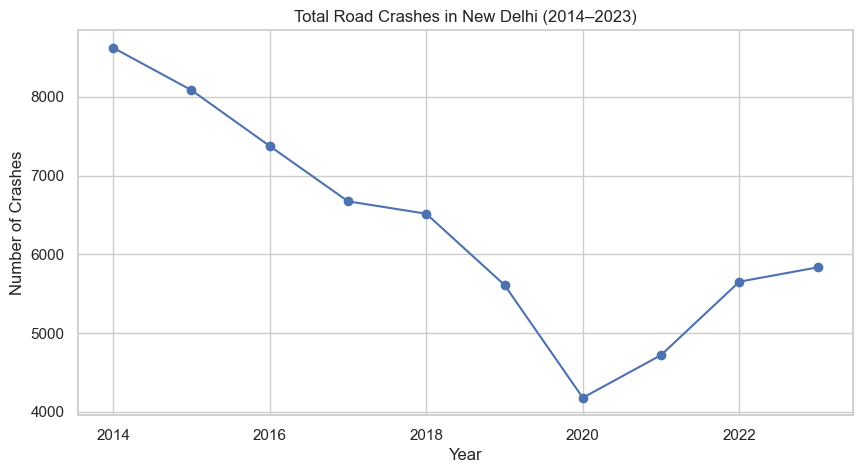

In [4]:
plt.figure(figsize=(10,5))
plt.plot(road_df["year"], road_df["road_crashes"], marker="o")
plt.title("Total Road Crashes in New Delhi (2014–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.show()


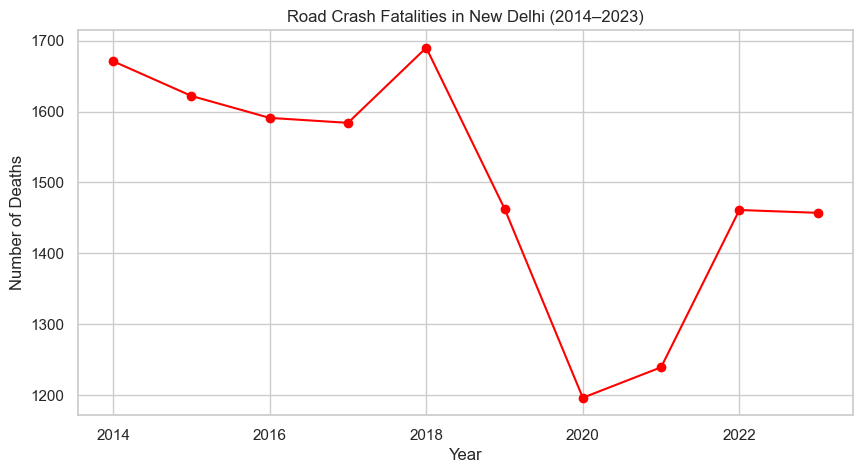

In [5]:
plt.figure(figsize=(10,5))
plt.plot(road_df["year"], road_df["road_crash_fatalities"], marker="o", color="red")
plt.title("Road Crash Fatalities in New Delhi (2014–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()


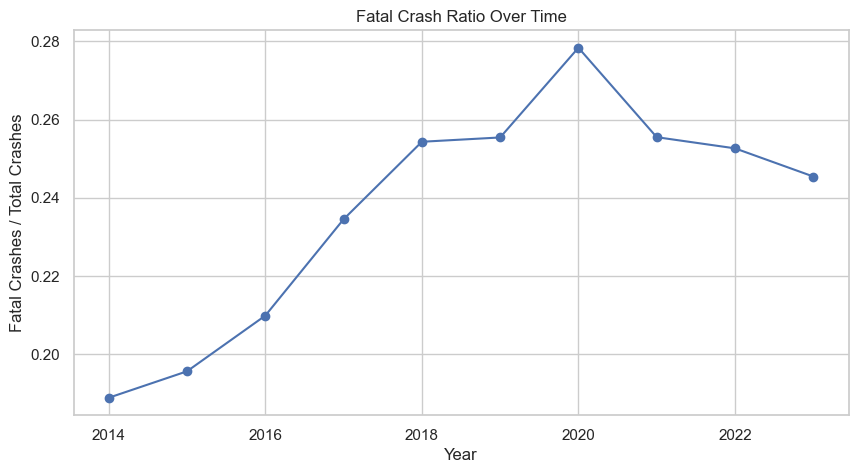

In [6]:
road_df["fatal_crash_ratio"] = (
    road_df["fatal_road_crashes"] / road_df["road_crashes"]
)

plt.figure(figsize=(10,5))
plt.plot(road_df["year"], road_df["fatal_crash_ratio"], marker="o")
plt.title("Fatal Crash Ratio Over Time")
plt.xlabel("Year")
plt.ylabel("Fatal Crashes / Total Crashes")
plt.show()


In [7]:
merged_df = road_df.merge(vehicle_totals, on="year")

merged_df["fatalities_per_10k_vehicles"] = (
    merged_df["road_crash_fatalities"] /
    merged_df["total_motor_vehicles"]
) * 10000


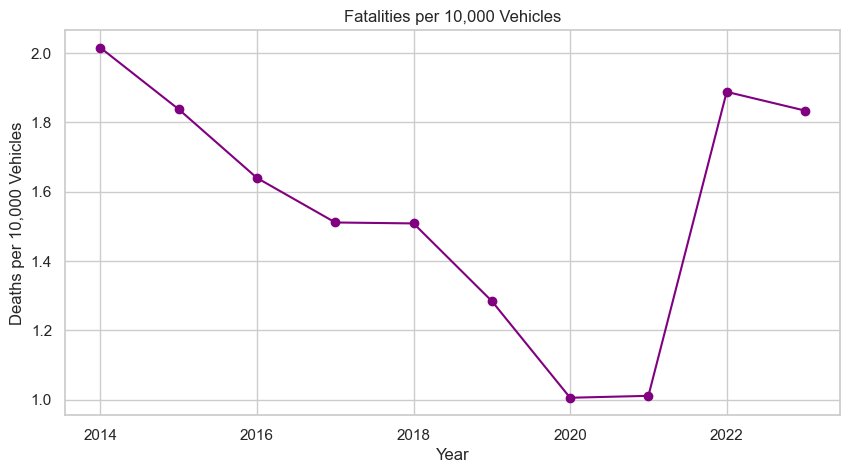

In [8]:
plt.figure(figsize=(10,5))
plt.plot(
    merged_df["year"],
    merged_df["fatalities_per_10k_vehicles"],
    marker="o",
    color="purple"
)
plt.title("Fatalities per 10,000 Vehicles")
plt.xlabel("Year")
plt.ylabel("Deaths per 10,000 Vehicles")
plt.show()


In [9]:
latest_year = victim_df[victim_df["year"] == victim_df["year"].max()]

death_cols = [
    col for col in victim_df.columns
    if col.endswith("_killed") and col != "total_killed"
]

death_share = latest_year[death_cols].T
death_share.columns = ["count"]
death_share["percentage"] = (
    death_share["count"] / latest_year["total_killed"].values[0]
) * 100

death_share.sort_values("percentage", ascending=False)


,count,percentage
pedestrian_killed,622,42.690460
scooter_motorcycle_riders_killed,549,37.680165
other_drivers_killed,184,12.628689
car_occupants_killed,45,3.088538
cyclists_killed,30,2.059025
slow_moving_vehicles_killed,24,1.647220
animal_driven_vehicles_killed,3,0.205903
bus_passengers_killed,0,0.000000


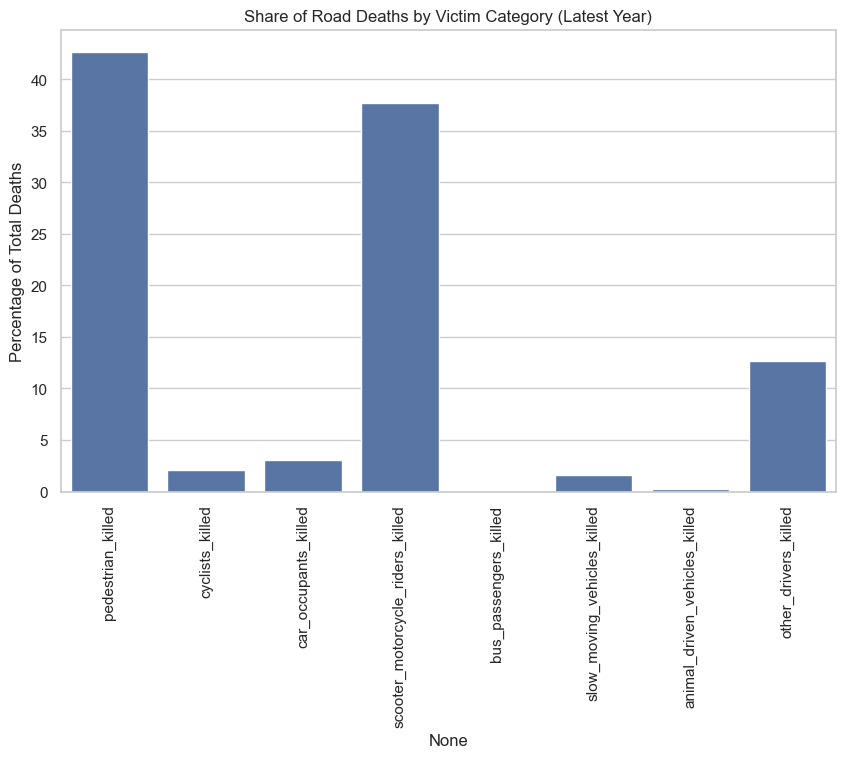

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=death_share.index,
    y=death_share["percentage"]
)
plt.xticks(rotation=90)
plt.title("Share of Road Deaths by Victim Category (Latest Year)")
plt.ylabel("Percentage of Total Deaths")
plt.show()


In [11]:
risk_2023 = vehicle_type_df[
    ["vehicle_type", "fatal_crashes_2023", "total_crashes_2023"]
].copy()

risk_2023["fatality_rate"] = (
    risk_2023["fatal_crashes_2023"] /
    risk_2023["total_crashes_2023"]
)

risk_2023.sort_values("fatality_rate", ascending=False).head(10)


,vehicle_type,fatal_crashes_2023,total_crashes_2023,fatality_rate
15,tanker,8,11,0.727273
20,military vehicle,1,2,0.500000
13,crane,13,30,0.433333
3,goods carrier,182,480,0.379167
0,unknown vehicle,660,1751,0.376927
12,tractor,15,44,0.340909
18,school bus,3,10,0.300000
17,other state bus,3,11,0.272727
7,cluster bus,28,103,0.271845
4,tempo,71,304,0.233553


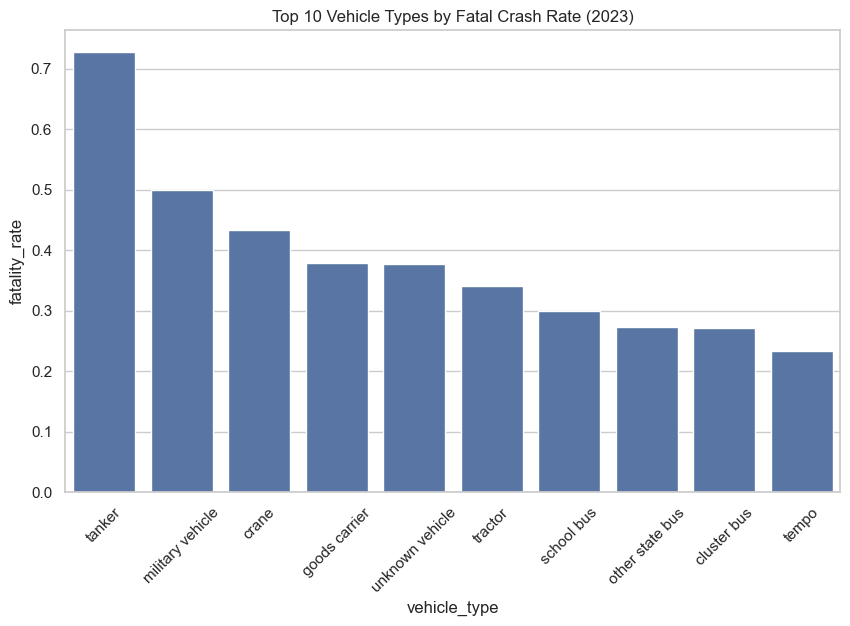

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=risk_2023.sort_values("fatality_rate", ascending=False).head(10),
    x="vehicle_type",
    y="fatality_rate"
)
plt.xticks(rotation=45)
plt.title("Top 10 Vehicle Types by Fatal Crash Rate (2023)")
plt.show()
